# **PMR3508 - Exercício Programa 02**: <br> **Redes Neurais e o Dataset MNIST**

---

---

## ✏️ **Cabeçalho**:



### **Nome**: `Davi Gonçalves Bezerra Coelho`

### **NUSP**: `13671699`

### **Hash**: `81`



---

## 📜 **Descrição:**



Neste exercício, você irá trabalhar com o **dataset MNIST**, um conjunto de dados com 70.000 imagens de dígitos escritos à mão. Seu objetivo será aplicar os conceitos de **Redes Neurais Artificiais (ANNs)** vistos na aula teórica. Este EP está dividido em tarefas, sua formatação não deve ser alterada, mas novas células de código ou texto podem ser criadas nos blocos de cada tarefa.



---

## ⚠️ **Instruções:**

- Complete todas as tarefas abaixo, respondendo às perguntas e escrevendo o código necessário.

- Comente seu código para facilitar a correção.

- Entregue o notebook no formato `.ipynb`.



---




## ✅ **Tarefas:**



1. **Probabilidades de dígitos no *dataset***       ⇒ `2 pontos`

2. **Análise Exploratória de Dados (EDA)**          ⇒ `2 pontos`

3. **Treinamento e teste de Modelos**               ⇒ `2 pontos`

4. **Comunicação de Resultados e Visualizações**    ⇒ `2 pontos`

5. **Publicação no *Kaggle* e Documentação**        ⇒ `2 pontos`



---



<br>

<center>

        <h1>

        <b>

        BOA SORTE !!!

        </b>

        </h1>

</center>

<br>



---

---

## ⏳ Loading dos Dados

In [1]:
import pickle

import random

import numpy as np

import os

from os.path import join



# Configuração de seeds para replicabilidade

np.random.seed(42)  # Seed para NumPy

random.seed(42)     # Seed para o módulo random



input_path = "../input/pmr3508-mnist"  # Obtém o diretório atual

images_filepath = join(input_path, 'MNIST-images.pkl')

labels_filepath = join(input_path, 'MNIST-labels.pkl')

validation_images_filepath = join(input_path, 'MNIST-validation-images.pkl')



with open(images_filepath, 'rb') as f:

    X_tot = pickle.load(f)



with open(labels_filepath, 'rb') as f:

    y_tot = pickle.load(f)



with open(validation_images_filepath, 'rb') as f:

    X_val = pickle.load(f)

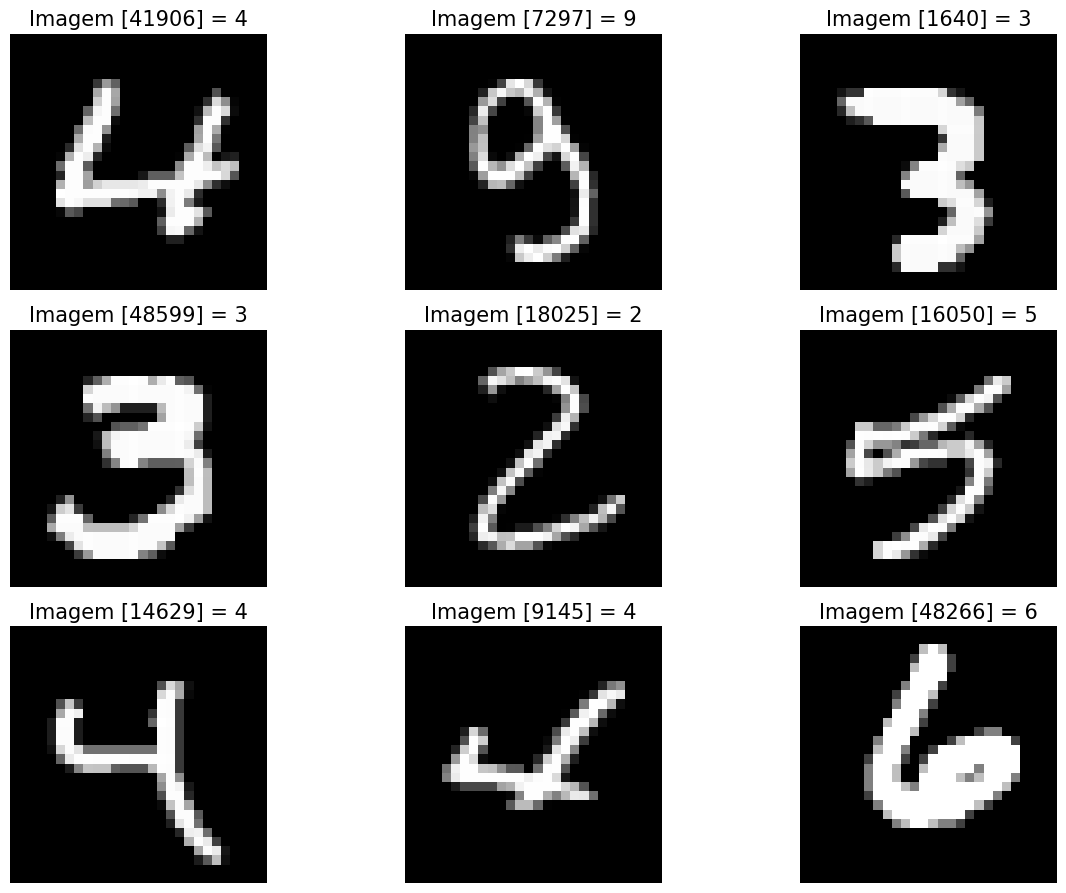

In [2]:
'''

TESTE DE CARREGAMENTO DO DATASET POR VISUALIZAÇÃO

Este bloco visualiza algumas imagens do dataset MNIST para verificar se o

carregamento foi realizado corretamente.

'''



%matplotlib inline

import random

import matplotlib.pyplot as plt



def show_images(images, title_texts):

    # Função para mostrar as imagens com seus respectivos títulos

    cols = 3  # Número de colunas na visualização

    rows = int(len(images) / cols) + 1  # Calcula o número de linhas

    plt.figure(figsize=(12, 12))  # Define o tamanho da figura

    index = 1

    for x in zip(images, title_texts):  # Itera sobre as imagens e títulos

        image = x[0]

        title_text = x[1]

        plt.subplot(rows, cols, index)  # Adiciona um subplot

        plt.axis('off')  # Desativa os eixos

        plt.imshow(image, cmap=plt.cm.gray)  # Mostra a imagem em escala de cinza

        if (title_text != ''):

            plt.title(title_text, fontsize=15)  # Define o título da imagem

        index += 1

    plt.tight_layout()  # Ajusta o layout para evitar sobreposição de títulos

    plt.show()  # Exibe a figura com as imagens e títulos



images_2_show = []  # Lista para armazenar as imagens a serem mostradas

titles_2_show = []  # Lista para armazenar os títulos das imagens

# Seleciona aleatoriamente 9 imagens de treino

for i in range(0, 9):

    r = random.randint(1, 60000)

    images_2_show.append(X_tot[r])  # Adiciona a imagem selecionada à lista

    titles_2_show.append(f"Imagem [{str(r)}] = {str(y_tot[r])}")  # Adiciona o título correspondente



show_images(images_2_show, titles_2_show)  # Exibe as imagens selecionadas

# 0️⃣ Suas bibliotecas

In [3]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# 1️⃣ Tarefa 01: Probabilidades 🎲

## 🧑🏻‍💻 Item a)



Descubra o número do Dataset associado ao seu Hash.


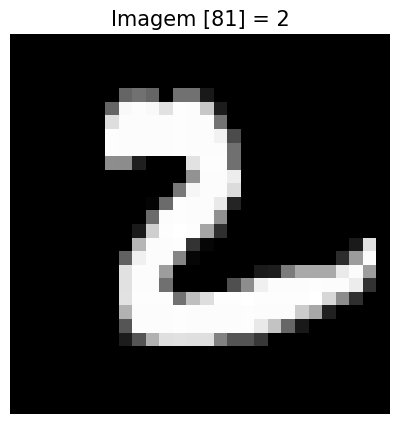

In [4]:
imagem = X_tot[81]

titulo = f"Imagem [{str(81)}] = {str(y_tot[81])}"

show_images([imagem], [titulo])

Ao olharmos o elemento da base de dados de índice 81, meu número de hash, podemos concluir que trata-se de um 2.

## 🔦 Item b)



Determine, para a imagem vinculada ao seu Hash, qual é a Probabilidade de um píxel claro (128 - 225) para esta única imagem?

In [5]:
claros = 0 

for linha in imagem:

    for pixel in linha:

        if 128 <= pixel <= 255:

            claros += 1

frequencia = claros / (28*28)

print(f"Total de claros = {claros}, Probabilidade de ser claro = {frequencia*100:.2f}%")

Total de claros = 141, Probabilidade de ser claro = 17.98%


Para calcular a probabilidade de um píxel claro na imagem, basta descobrirmos a frequência com a qual eles aparecem na imagem analisada. A fim de contá-los, vou olhar cada píxel da imagem e identificar quais estão na faixa 128-255. Por fim, basta dividir o número encontrado pelo número total de píxels na imagem: essa será a probabilidade que buscamos.

## ♟️ Item c)



Qual é a probabilidade de um píxel ser claro dentre todos os píxeis que tem a mesma classe que a sua imagem obtida em a)?

In [6]:
numeros_2 = []

for i in range(len(y_tot)):

    if y_tot[i] == 2:

        numeros_2.append(i)



print(f"Lista de índices de imagens do número 2: {numeros_2}")


Lista de índices de imagens do número 2: [0, 23, 34, 35, 38, 39, 47, 55, 71, 77, 80, 81, 101, 127, 131, 139, 146, 155, 169, 175, 183, 190, 198, 209, 251, 261, 263, 272, 291, 302, 303, 307, 316, 319, 321, 322, 342, 343, 356, 362, 373, 382, 393, 401, 402, 405, 412, 413, 443, 445, 475, 497, 529, 544, 554, 565, 575, 577, 584, 588, 597, 618, 620, 623, 624, 627, 635, 656, 658, 666, 670, 679, 693, 700, 710, 715, 718, 731, 735, 755, 781, 798, 800, 811, 815, 823, 824, 834, 846, 851, 877, 882, 892, 899, 902, 936, 948, 952, 954, 956, 986, 995, 1011, 1020, 1030, 1042, 1043, 1051, 1052, 1056, 1077, 1079, 1085, 1097, 1108, 1123, 1127, 1130, 1138, 1155, 1163, 1182, 1186, 1189, 1190, 1206, 1209, 1227, 1231, 1240, 1241, 1251, 1279, 1288, 1303, 1308, 1329, 1333, 1335, 1349, 1356, 1360, 1369, 1373, 1377, 1379, 1384, 1388, 1392, 1422, 1441, 1444, 1449, 1451, 1463, 1473, 1481, 1496, 1512, 1519, 1528, 1535, 1565, 1594, 1597, 1602, 1614, 1617, 1638, 1642, 1665, 1667, 1672, 1674, 1676, 1682, 1700, 1704, 1706,

In [7]:
claros = 0

for imagem in X_tot[numeros_2]: 

    for linha in imagem:

        for pixel in linha:

            if 128 <= pixel <= 255:

                claros += 1



frequencia = claros / (28*28*len(numeros_2))

print(f"Total de claros = {claros}, Probabilidade de ser claro = {frequencia*100:.2f}%")

Total de claros = 712932, Probabilidade de ser claro = 15.10%


Para encontrar a probabilidade de um píxel ser claro para todos os números 2 da base, basta analisar todas as imagens rotuladas como 2, somar o número total de píxels claros encontrados nelas e dividir pelo total de píxels presente nas imagens.

---

# 2️⃣ Tarefa 02: Análise Exploratória de Dados 📊

## ✨ Item a)



Conte quantas vezes cada dígito (de 0 a 9) aparece e responda:



1. Todos os dígitos aparecem a mesma quantidade?



2. Qual o valor médio dos píxeis de cada dígito?

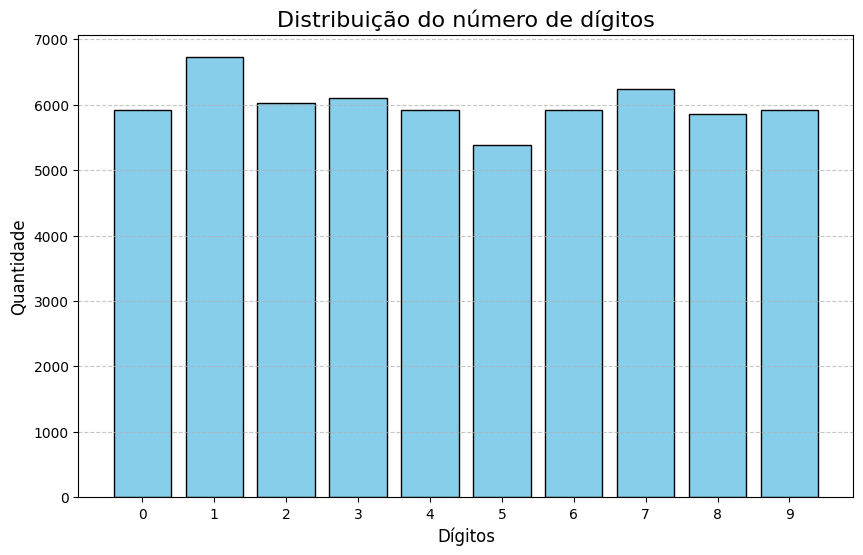

In [8]:
totais = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(10):

    totais[i] = len([j for j in y_tot if j == i])

digitos = [str(i) for i in range(10)]



plt.figure(figsize=(10, 6))

plt.bar(digitos, totais, color='skyblue', edgecolor='black')



plt.xlabel('Dígitos', fontsize=12)

plt.ylabel('Quantidade', fontsize=12)

plt.title('Distribuição do número de dígitos', fontsize=16)



plt.grid(axis='y', linestyle='--', alpha=0.7)



plt.show()

É possível perceber que a base não está 100% balanceada: apesar de a quantidade de aparições de cada dígito serem consideravelmente próximas, elas não são iguais.

[44.22823359073359, 19.402653250891433, 38.02123789080633, 36.232239350628085, 31.04155990716665, 32.92402884702988, 35.24354050580503, 29.255536753014766, 38.40304009667391, 31.339627530343446]


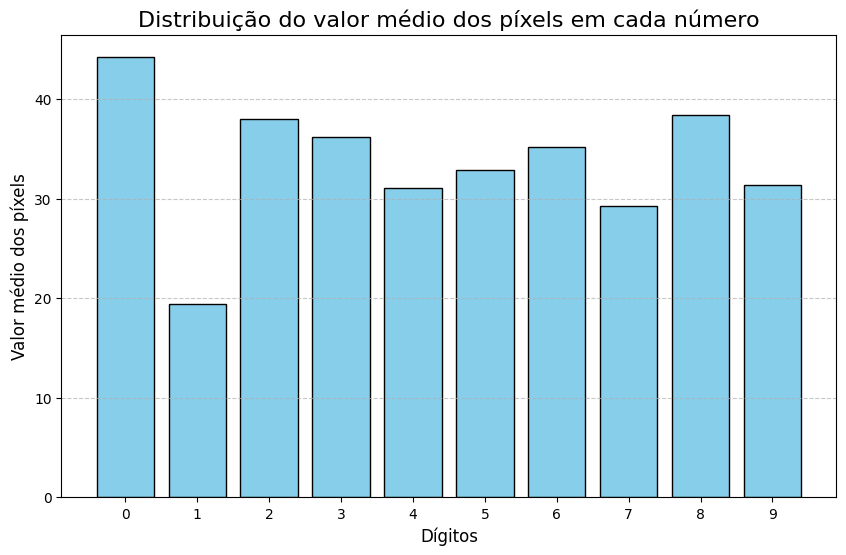

In [9]:
medias = []

for i in range(10):

    imagens_numero_atual = [j for j in range(len(y_tot)) if y_tot[j] == i]

    total = 0

    for imagem in X_tot[imagens_numero_atual]:

        for linha in imagem:

            for pixel in linha:

                total += pixel

    media = total / (len(imagens_numero_atual)*28*28)

    medias.append(media)



print(medias)



plt.figure(figsize=(10, 6))

plt.bar(digitos, medias, color='skyblue', edgecolor='black')



plt.xlabel('Dígitos', fontsize=12)

plt.ylabel('Valor médio dos píxels', fontsize=12)

plt.title('Distribuição do valor médio dos píxels em cada número', fontsize=16)



plt.grid(axis='y', linestyle='--', alpha=0.7)



plt.show()

Podemos observar que alguns dígitos ocupam um espaço maior na tela ao ser desenhados, ou seja, possuem uma maior quantidade de píxels claros e consequentemente um valor médio maior ao analisarmos todos os píxels.

### Resposta 01: 

Não, isso fica claro quando analisamos os números 1 e 5, sendo que o primeiro apresenta uma quantidade consideravelmente superior a do segundo.

### Resposta 02: 

Temos:



0. 44.22823359073359

1. 19.402653250891433

2. 38.02123789080633

3. 36.232239350628085

4. 31.04155990716665

5. 32.92402884702988

6. 35.24354050580503

7. 29.255536753014766 

8. 38.40304009667391

9. 31.339627530343446

### Resposta 03: ccccc

## 📏 Item b)



Faça um histograma que mostre a distribuição dos valores dos píxeis para cada dígito. Há muitos valores que são “apagados” (ou seja, com valor 0) ou a distribuição dos valores é mais equilibrada entre os dígitos?


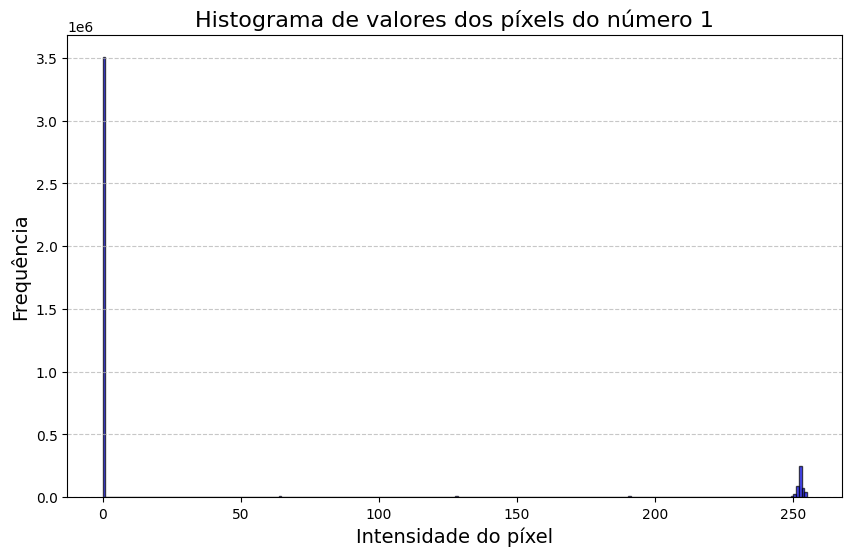

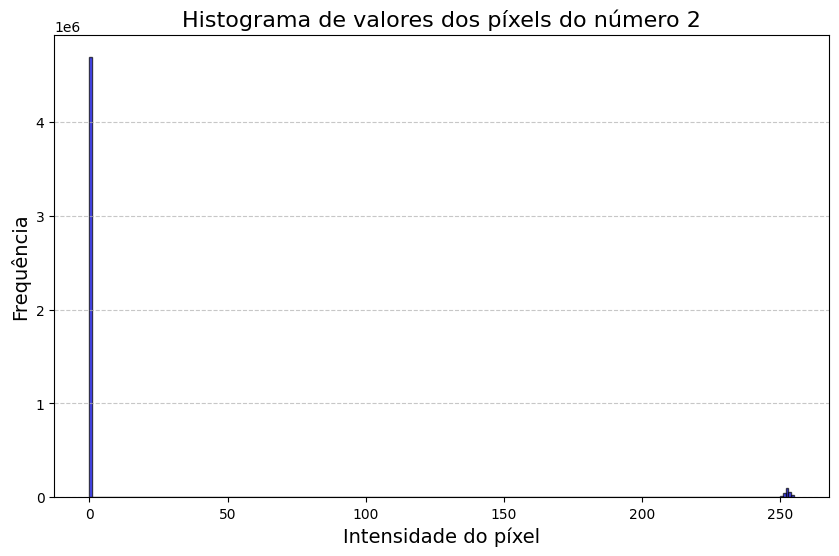

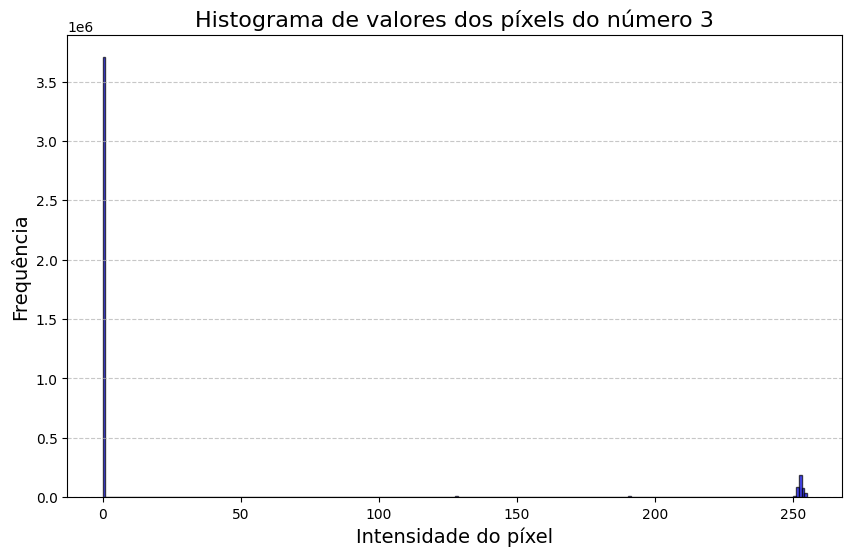

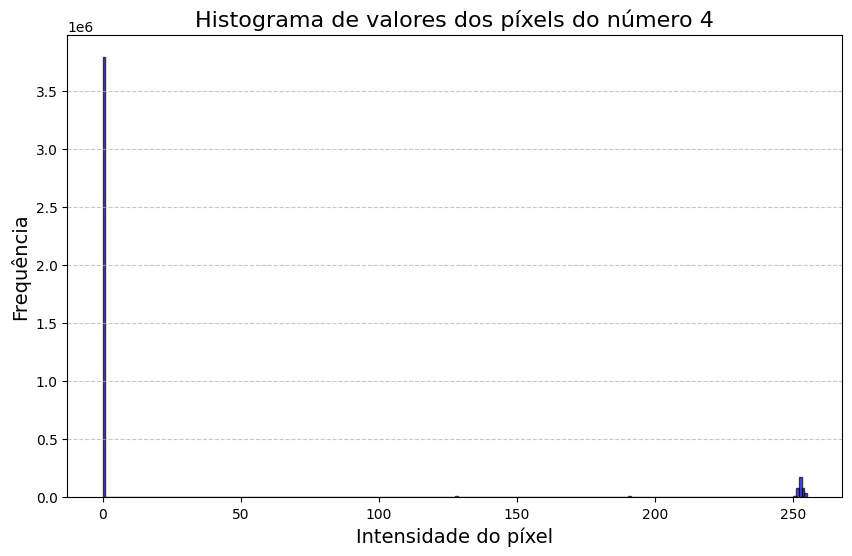

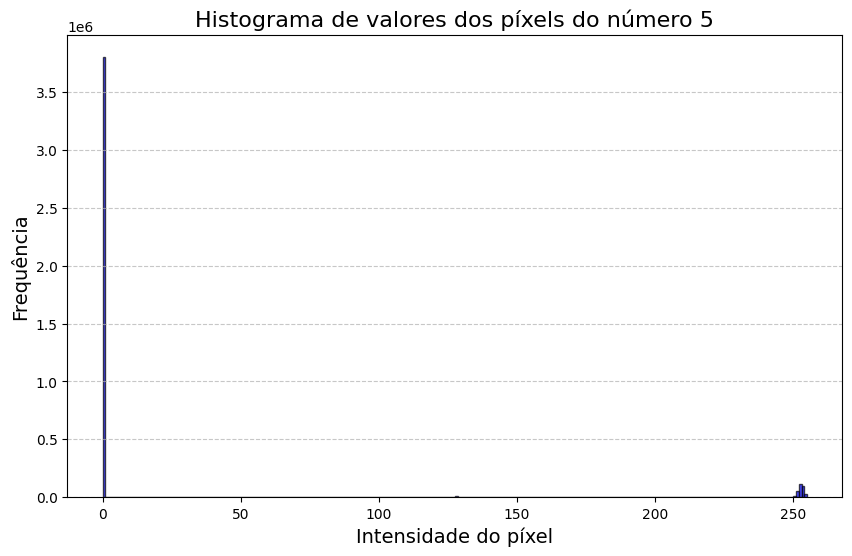

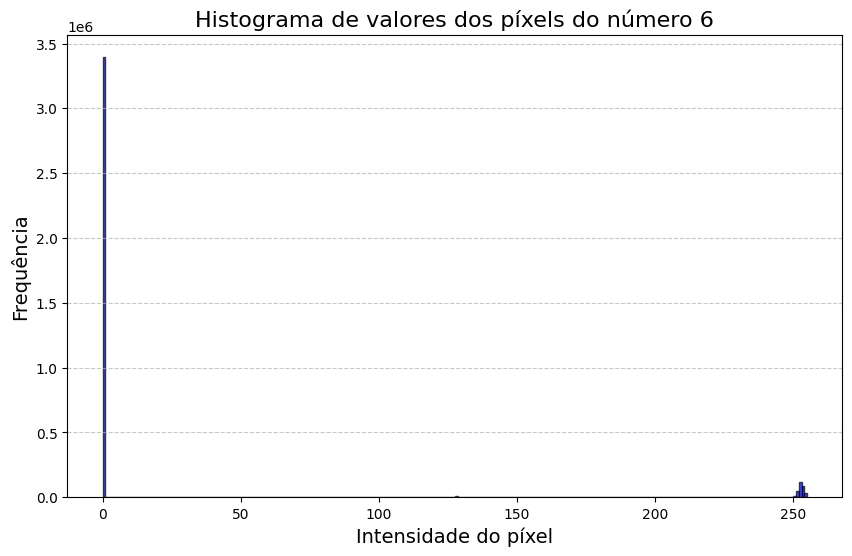

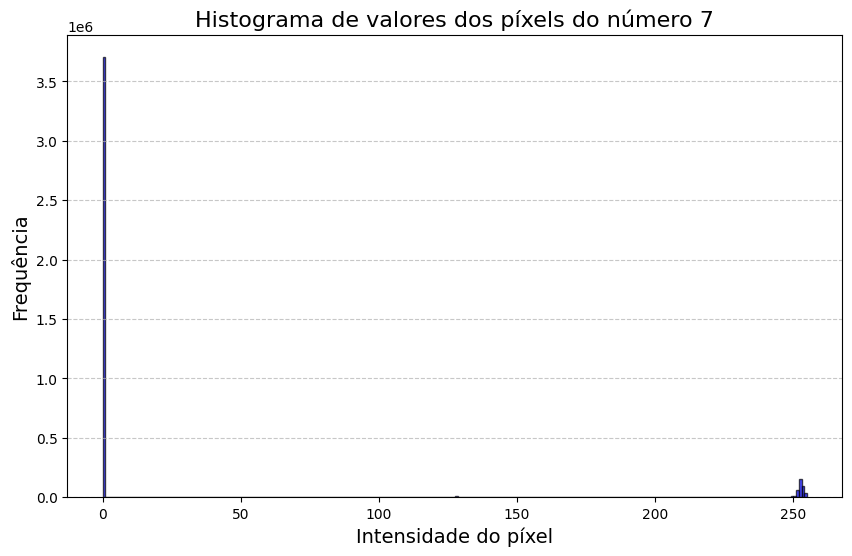

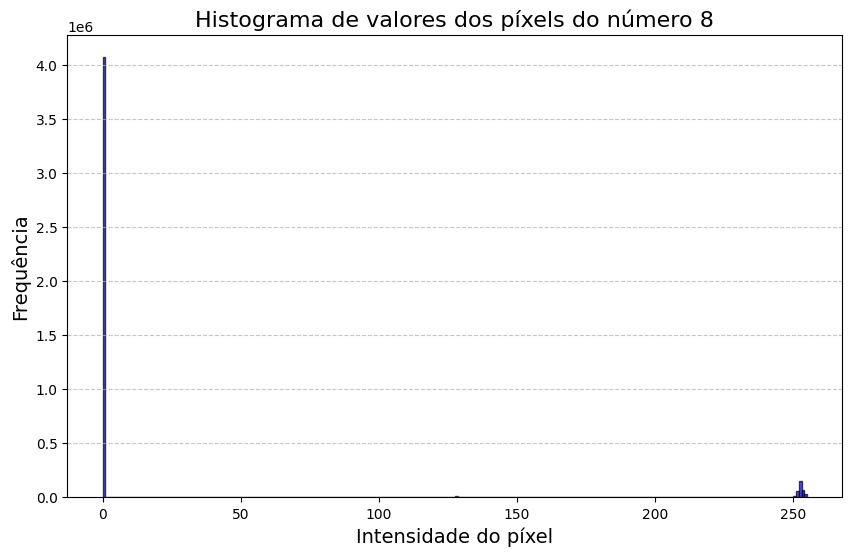

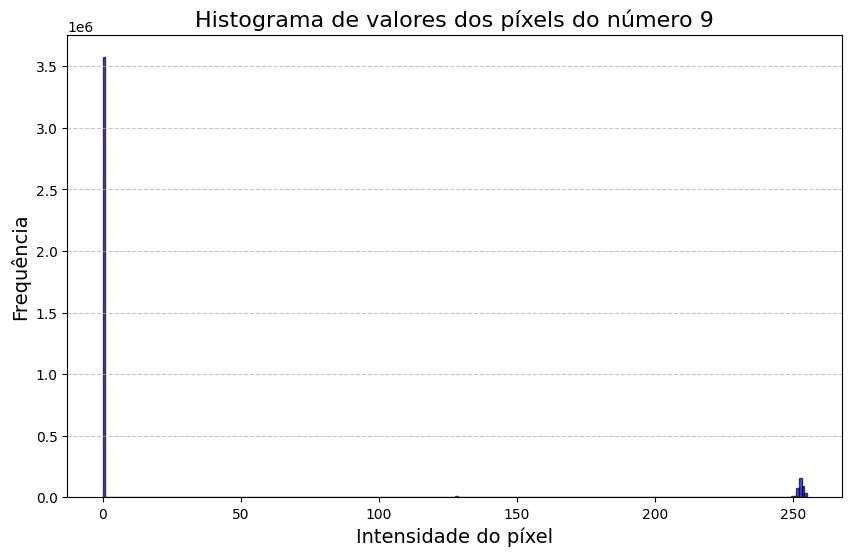

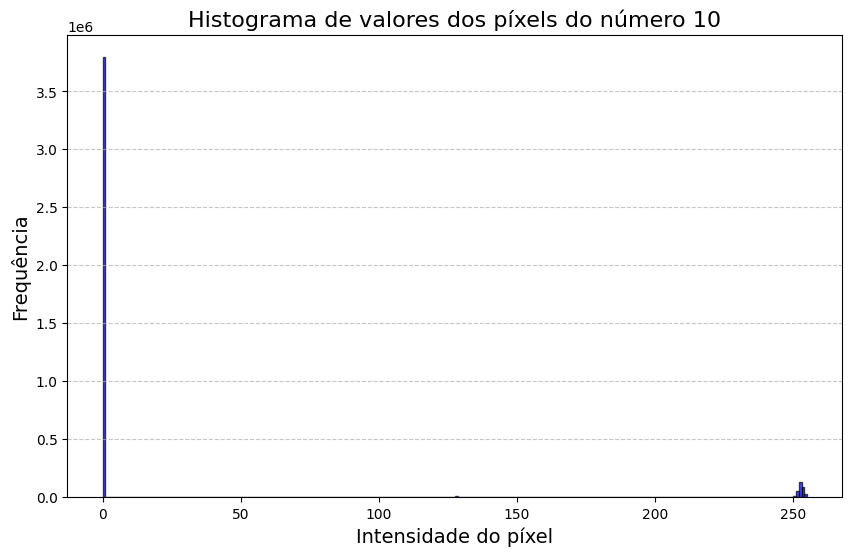

In [10]:
colecao_numeros = []

for i in range(10):

    imagens_numero_atual = [j for j in range(len(y_tot)) if y_tot[j] == i]

    colecao_numeros.append([X_tot[imagens_numero_atual]])





for i, numero in enumerate(colecao_numeros):

    pixels = np.concatenate([imagem.flatten() for imagem in colecao_numeros[i]])

    plt.figure(figsize=(10, 6))

    plt.hist(pixels, bins=256, range=(0, 255), color='blue', alpha=0.7, edgecolor='black')

    plt.title(f'Histograma de valores dos píxels do número {i+1}', fontsize=16)

    plt.xlabel('Intensidade do píxel', fontsize=14)

    plt.ylabel('Frequência', fontsize=14)

    plt.grid(axis='y', linestyle='--', alpha=0.7)


Como podemos ver, a grande maioria dos píxels contidos nas imagens possui valor zero.



Temos também uma quantidade considerável de píxels perto da outra extremidade, perto de 250, o que nós vínhamos chamando de píxels claros.



Já a frequência dos valores intermediários é praticamente nula.

## 🤓 Item c)



Crie uma imagem para cada dígito (de 0 a 9) em que cada píxel dessa nova imagem representa a média do valor dos píxeis para aquela classe. Você consegue reconhecer os dígitos nas imagens criadas?

In [11]:
imagens_media = []

for i in range(10):

    imagens_media.append([])

    for j in range(28):

        imagens_media[i].append([])

        for k in range(28):

            imagens_media[i][j].append(0)

for i in range(10):

    imagens_numero_atual = [j for j in range(len(y_tot)) if y_tot[j] == i]

    total = 0

    for imagem in X_tot[imagens_numero_atual]:

        for j in range(28):

            for k in range(28):

                imagens_media[i][j][k] += imagem[j][k] / len(imagens_numero_atual)


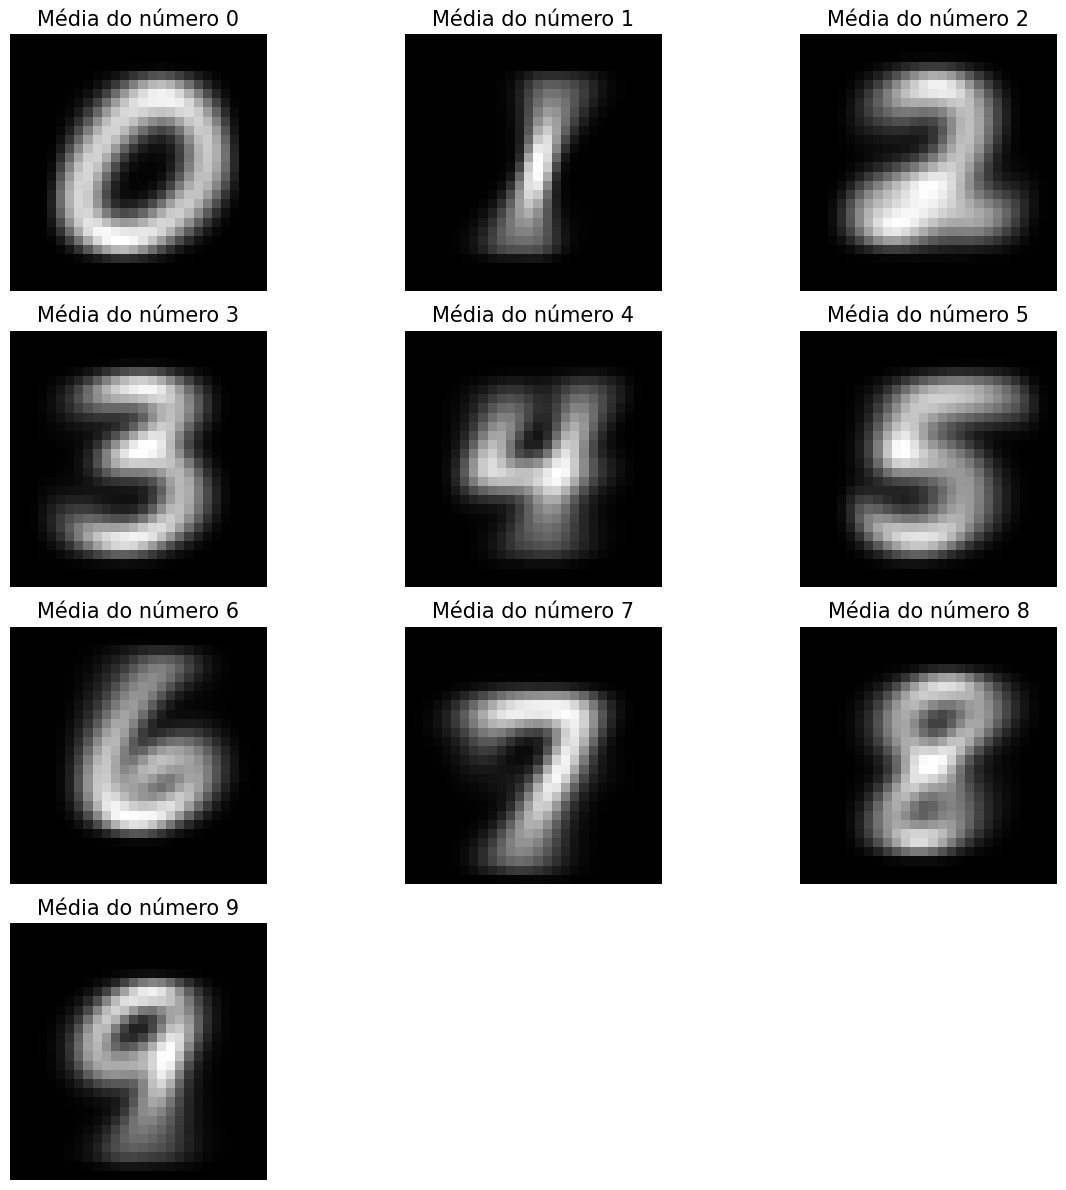

In [12]:
images_to_show = []  

titles_to_show = []  

for i in range(0, 10):

    images_to_show.append(imagens_media[i])  

    titles_to_show.append(f"Média do número {i}")  

show_images(images_to_show, titles_to_show)  

Ao observarmos as imagens geradas pela média de cada píxel, podemos dizer que possível reconhecer cada uns dos dígitos, ainda que alguns estejam mais claros e fáceis de identificar que outros.

---

# 3️⃣ Tarefa 03: Treinamento e Teste de Modelos 🤖

## 📈 Item a)



Treine a ANN1 com 784 entradas, 8 neurônios na 1⁠ª camada oculta, 8 neurônios na 2⁠ª camada oculta e 10 saídas. Utilize 5 épocas para o treinamento. Use a biblioteca `scikit-learn`:



- Input Layer: 784 entradas (28x28);

- Hidden Layer 1: 8 neurônios;

- Hidden Layer 2: 8 neurônios;

- Output Layer: 10 saídas; (Classificador 0-9)

- Treine com 10 épocas.

In [13]:
modeloa = MLPClassifier(

    hidden_layer_sizes=(8, 8),  

    max_iter=10,               

    random_state=42,              

)



X = []

for imagem in X_tot:

    X.append(imagem.flatten())



scaler = StandardScaler()

X = scaler.fit_transform(X)



X_treino, X_teste, y_treino, y_teste = train_test_split(X, y_tot, test_size=0.3, random_state=42)



modeloa.fit(X_treino, y_treino)



y_pred_a = modeloa.predict(X_teste)



print("Acurácia:", accuracy_score(y_teste, y_pred_a))

print("Resumo:\n", classification_report(y_teste, y_pred_a))

Acurácia: 0.908
Resumo:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      1790
           1       0.93      0.95      0.94      2045
           2       0.89      0.91      0.90      1817
           3       0.91      0.85      0.88      1820
           4       0.91      0.90      0.91      1762
           5       0.87      0.87      0.87      1605
           6       0.94      0.93      0.93      1753
           7       0.92      0.92      0.92      1943
           8       0.90      0.87      0.88      1716
           9       0.89      0.89      0.89      1749

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Obtivemos um resultado satisfatório com o primeiro modelo, com uma acurácia um pouco superior a 90%.

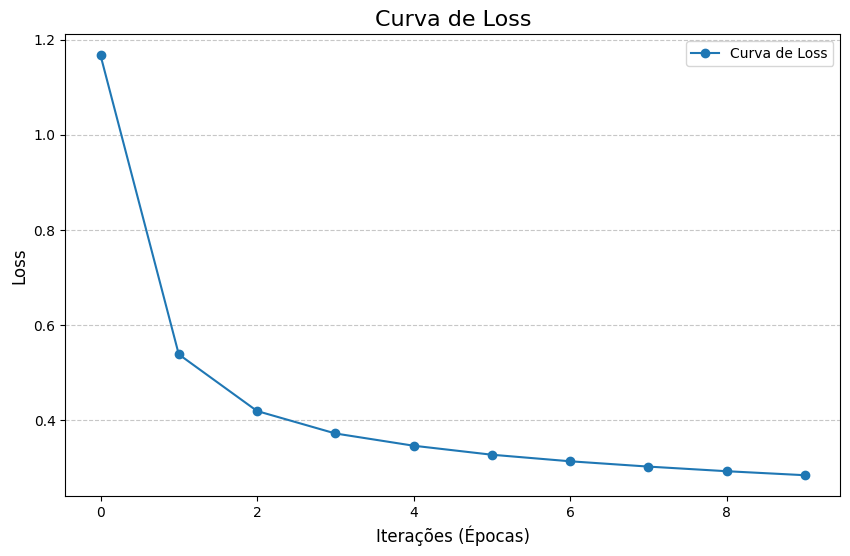

In [14]:
plt.figure(figsize=(10, 6))

plt.plot(modeloa.loss_curve_, marker='o', label='Curva de Loss')

plt.title('Curva de Loss', fontsize=16)

plt.xlabel('Iterações (Épocas)', fontsize=12)

plt.ylabel('Loss', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()

plt.show()

Analisando o gráfico, percebemos que ele ainda estava descrescendo e não havia chegado a um estágio verdadeiramente estável. Isso nos indica que um número maior de iterações provavelmente aumentaria a eficiência do nosso modelo.

## 📉 Item b)



Treine a ANN2 com 784 entradas, 256 neurônios na 1⁠ª camada oculta, 256 neurônios na 2⁠ª camada oculta, 256 neurônios na 3ª camada oculta, 256 neurônios na 4ª camada oculta e 10 saídas. Utilize 20 épocas dessa vez. Use a biblioteca `scikit-learn`.



- Input Layer: 784 entradas (28x28);

- Hidden Layer 1: 256 neurônios;

- Hidden Layer 2: 256 neurônios;

- Hidden Layer 3: 256 neurônios;

- Hidden Layer 4: 256 neurônios;

- Output Layer: 10 saídas; (Classificação 0-9)

- Treine com 20 épocas.

In [15]:
modelob = MLPClassifier(

    hidden_layer_sizes=(256, 256, 256, 256),

    max_iter=20,               

    random_state=42,              

)



modelob.fit(X_treino, y_treino)



y_pred_b = modelob.predict(X_teste)



print("Acurácia:", accuracy_score(y_teste, y_pred_b))

print("Resumo:\n", classification_report(y_teste, y_pred_b))

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia: 0.9738888888888889
Resumo:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1790
           1       0.99      0.99      0.99      2045
           2       0.98      0.97      0.97      1817
           3       0.97      0.97      0.97      1820
           4       0.98      0.97      0.97      1762
           5       0.97      0.96      0.96      1605
           6       0.98      0.98      0.98      1753
           7       0.97      0.97      0.97      1943
           8       0.96      0.97      0.97      1716
           9       0.97      0.96      0.96      1749

    accuracy                           0.97     18000
   macro avg       0.97      0.97      0.97     18000
weighted avg       0.97      0.97      0.97     18000



Por outro lado, aumentando a complexidade do modelo ao adicionar mais neurônios e mais camadas, conseguimos um resultado muito superior, chegando a 96% de acurácia. 

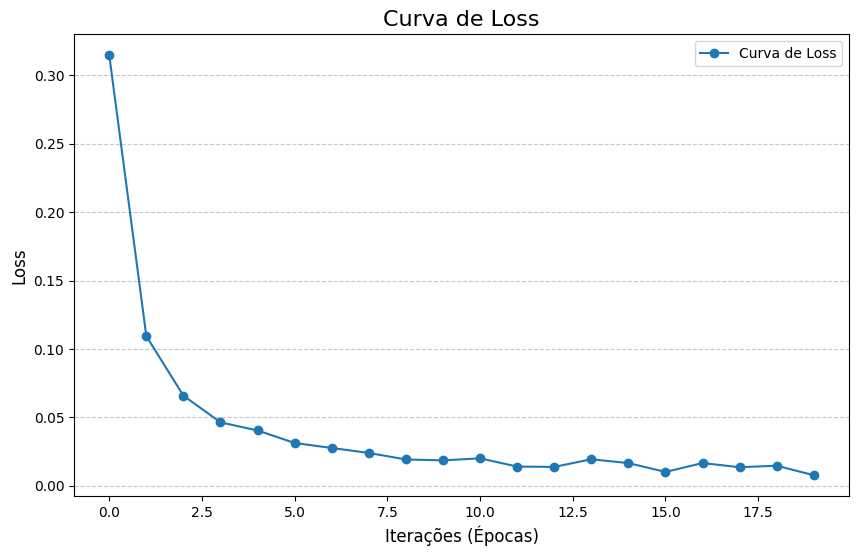

In [16]:
plt.figure(figsize=(10, 6))

plt.plot(modelob.loss_curve_, marker='o', label='Curva de Loss')

plt.title('Curva de Loss', fontsize=16)

plt.xlabel('Iterações (Épocas)', fontsize=12)

plt.ylabel('Loss', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()

plt.show()

Esse caso difere-se da letra a) pois percebemos que na 20ª iteração o modelo já estava em um estágio consideravelmente estável. Ainda é possível argumentar que as iterações seguintes a 14ª ou 15ª possam ser desnecessárias, uma vez que a Loss do modelo não estava mais decrescendo a partir desse ponto e estava apenas flutuando.

## ⚙️ Item c)



Agora você treinará um novo modelo, mais adequado. Para isso, gere ao menos 5 configurações de redes neurais, variando o número de camadas ocultas, o número de neurônios e o número de épocas. As configurações devem estar intermediárias entre `[8, 8]` e `[256, 256, 256, 256]`.



Utilize a função `GridSearchCV` para realizar uma busca exaustiva pelos hiperparâmetros e encontre a configuração que oferece o melhor classificador, justificando sua escolha com base nas métricas de validação.

In [17]:
param_grid = {

    'hidden_layer_sizes': [

        (16),            

        (32, 32),        

        (64, 64, 64),    

        (256, 256, 256), 

        (256, 256, 256, 256)  

    ],

    'max_iter': [10, 15, 20],   

    'solver': ['adam'],         

    'activation': ['relu']      

}



grid_search = GridSearchCV(

    estimator=MLPClassifier(random_state=42),

    param_grid=param_grid,

    scoring='accuracy',

    return_train_score=True,         

    cv=3,                       

    verbose=2,                  

    n_jobs=-1                   

)

In [18]:
grid_search.fit(X_treino, y_treino)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [16, (32, 32), (64, 64, 64),
                                                (256, 256, 256),
                                                (256, 256, 256, 256)],
                         'max_iter': [10, 15, 20], 'solver': ['adam']},
             return_train_score=True, scoring='accuracy', verbose=2)

In [19]:
print("Melhores parâmetros:", grid_search.best_params_)

print("Melhor acurácia no cross-validation:", grid_search.best_score_)



modeloc = grid_search.best_estimator_

y_pred_c = modeloc.predict(X_teste)

print("Acurácia:", accuracy_score(y_teste, y_pred_c))

print("Resumo:\n", classification_report(y_teste, y_pred_c))

Melhores parâmetros: {'activation': 'relu', 'hidden_layer_sizes': (256, 256, 256), 'max_iter': 20, 'solver': 'adam'}
Melhor acurácia no cross-validation: 0.9710714285714285
Acurácia: 0.9756666666666667
Resumo:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1790
           1       0.98      0.99      0.98      2045
           2       0.96      0.98      0.97      1817
           3       0.98      0.96      0.97      1820
           4       0.97      0.97      0.97      1762
           5       0.98      0.96      0.97      1605
           6       0.97      0.99      0.98      1753
           7       0.98      0.98      0.98      1943
           8       0.97      0.96      0.97      1716
           9       0.97      0.98      0.97      1749

    accuracy                           0.98     18000
   macro avg       0.98      0.98      0.98     18000
weighted avg       0.98      0.98      0.98     18000



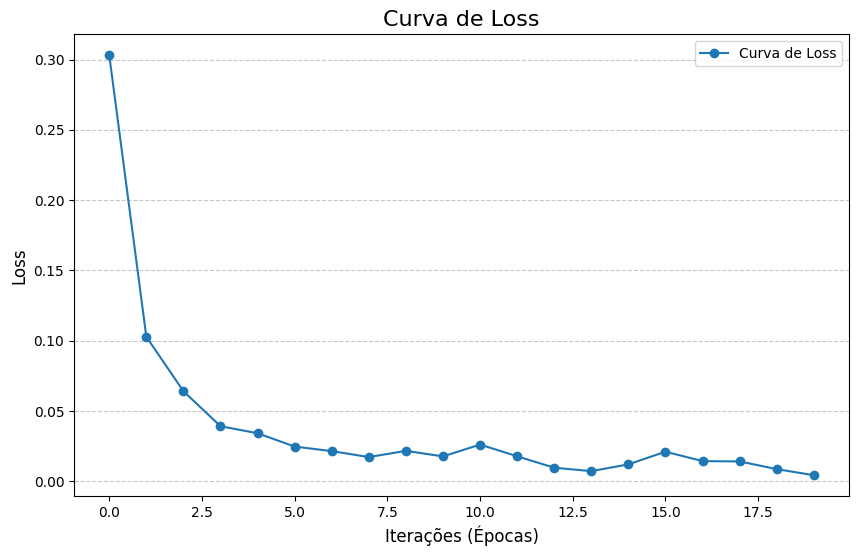

In [20]:
plt.figure(figsize=(10, 6))

plt.plot(modeloc.loss_curve_, marker='o', label='Curva de Loss')

plt.title('Curva de Loss', fontsize=16)

plt.xlabel('Iterações (Épocas)', fontsize=12)

plt.ylabel('Loss', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()

plt.show()

## 🔧 Item d)



Para os modelos treinados nas questões a) e b), além do classificador encontrado na questão c), compare o desempenho dos modelos, analisando se apresentam *underfitting* ou *overfitting*. Justifique com gráficos e análises.


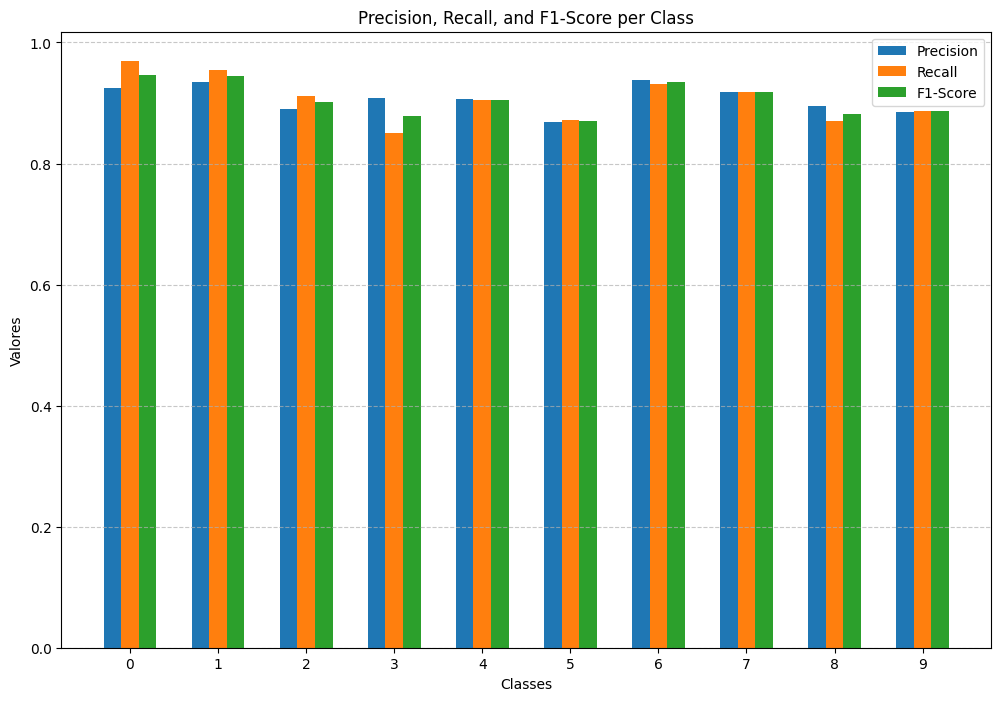

In [21]:
report = classification_report(y_teste, y_pred_a, output_dict=True)



classes = [str(i) for i in range(10)]  



precision = [report[cls]['precision'] for cls in classes]

recall = [report[cls]['recall'] for cls in classes]

f1_score = [report[cls]['f1-score'] for cls in classes]

support = [report[cls]['support'] for cls in classes]



plt.figure(figsize=(12, 8))

x = np.arange(len(classes)) 



plt.bar(x - 0.2, precision, width=0.2, label='Precision', align='center')

plt.bar(x, recall, width=0.2, label='Recall', align='center')

plt.bar(x + 0.2, f1_score, width=0.2, label='F1-Score', align='center')



plt.xticks(x, classes)

plt.xlabel('Classes')

plt.ylabel('Valores')

plt.title('Precision, Recall, and F1-Score per Class')

plt.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


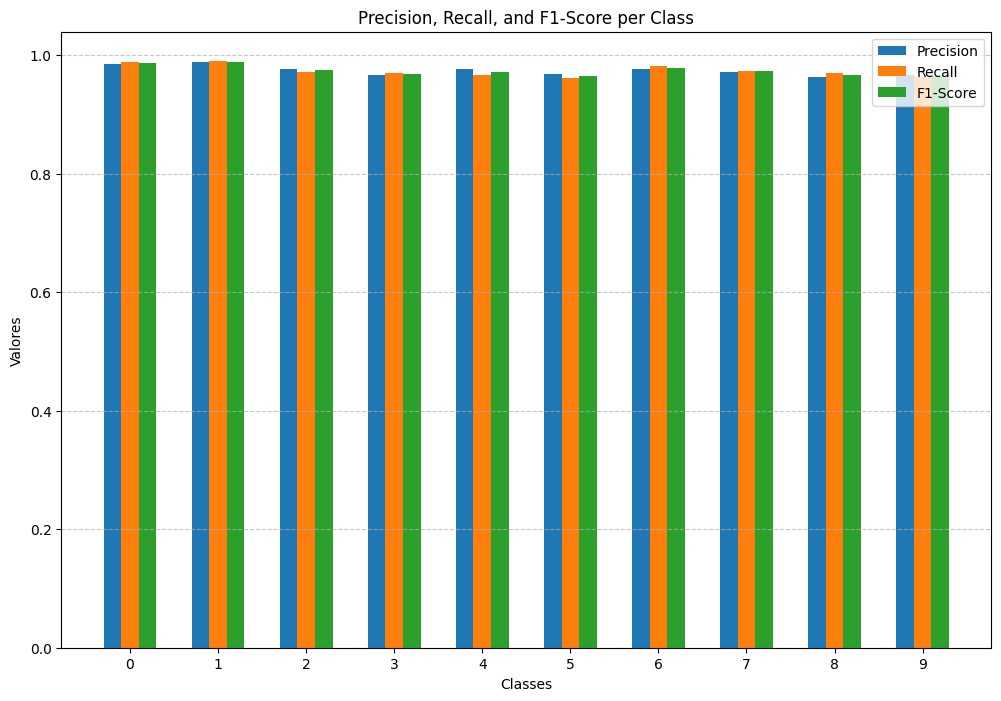

In [22]:
report = classification_report(y_teste, y_pred_b, output_dict=True)





classes = [str(i) for i in range(10)]  





precision = [report[cls]['precision'] for cls in classes]

recall = [report[cls]['recall'] for cls in classes]

f1_score = [report[cls]['f1-score'] for cls in classes]

support = [report[cls]['support'] for cls in classes]



plt.figure(figsize=(12, 8))

x = np.arange(len(classes)) 



plt.bar(x - 0.2, precision, width=0.2, label='Precision', align='center')

plt.bar(x, recall, width=0.2, label='Recall', align='center')

plt.bar(x + 0.2, f1_score, width=0.2, label='F1-Score', align='center')



plt.xticks(x, classes)

plt.xlabel('Classes')

plt.ylabel('Valores')

plt.title('Precision, Recall, and F1-Score per Class')

plt.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

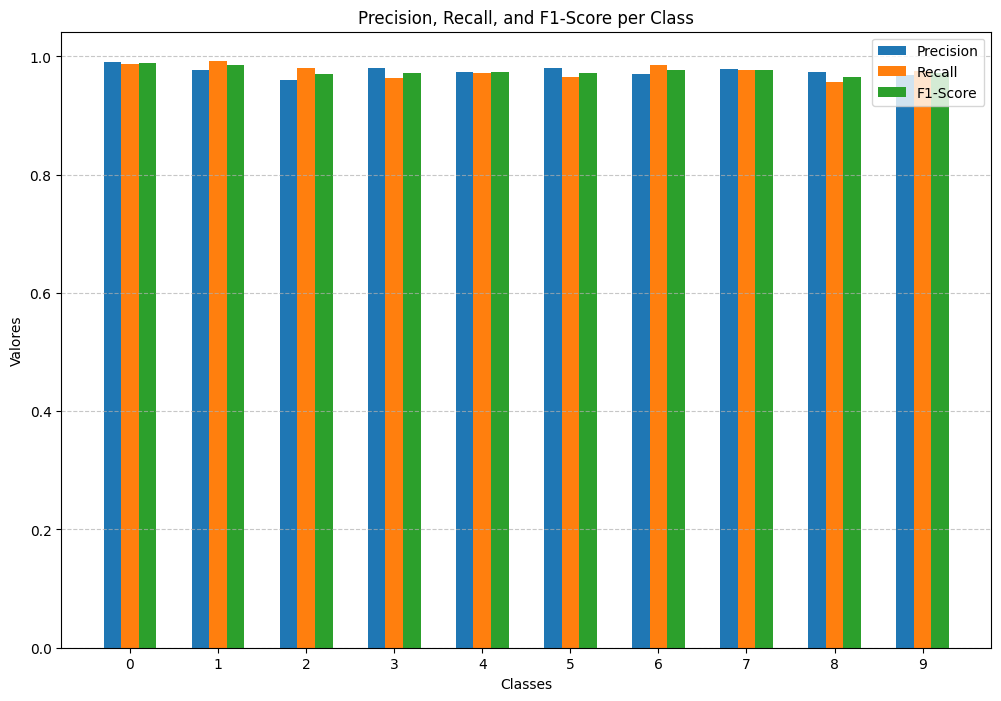

In [23]:
report = classification_report(y_teste, y_pred_c, output_dict=True)



classes = [str(i) for i in range(10)]  



precision = [report[cls]['precision'] for cls in classes]

recall = [report[cls]['recall'] for cls in classes]

f1_score = [report[cls]['f1-score'] for cls in classes]

support = [report[cls]['support'] for cls in classes]



plt.figure(figsize=(12, 8))

x = np.arange(len(classes)) 



plt.bar(x - 0.2, precision, width=0.2, label='Precision', align='center')

plt.bar(x, recall, width=0.2, label='Recall', align='center')

plt.bar(x + 0.2, f1_score, width=0.2, label='F1-Score', align='center')



plt.xticks(x, classes)

plt.xlabel('Classes')

plt.ylabel('Valores')

plt.title('Precision, Recall, and F1-Score per Class')

plt.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Observando os gráficos e dados apresentados, podemos chegar a algumas conclusões:

* O modelo da letra a) pode sofrer de underfitting, uma vez que é um modelo mais simples, menos flexível, e que capturou não tão bem as particularidades do problema apresentado. Podemos chegar a essa conclusão devido ao baixo desempenho do modelo comparado aos outros, com uma acurácia mais perto de 90%.
* Já o modelo da letra b) apresenta um desempenho ótimo. Isso acontece pois aumentamos a complexidade do modelo, adicionando mais camadas e neurônios, de forma que ele tornou-se mais flexível e pôde capturar com mais precisão as particularidades dos dados, além de aumentar o número de épocas. Porém, esse é um caminho que devemos seguir com cuidado, uma vez que o modelo possa ficar muito adaptado aos dados de treino mas caia bruscamente de performance ao ser testado com dados externos, acontecendo o que chamamos de overfitting. Nesse caso, não é o que se observa, uma vez que o modelo apresenta resultados ótimos até mesmo para a base de teste.
* O modelo da letra c) é o que apresenta apresenta o melhor desempenho dos 3, graças a eficiência da técnica de cross-validation. Ele apresenta a maior acurácia entre os modelos e é muito constante entre todas as classes (dígitos). Além disso, não podemos dizer que o modelo sofre de overfitting pois seu resultado durante o cross-validation foi muito similar àquele visto na base de teste.

---

# 4️⃣ Tarefa 04: Resultados e Visualizações 🤞🏻

## 🐳 Item a)



Gere e apresente uma matriz de confusão que mostre a distribuição das previsões do melhor modelo. Quais as métricas de Acurácia, Precisão, Recall e F1-Score para esse modelo?

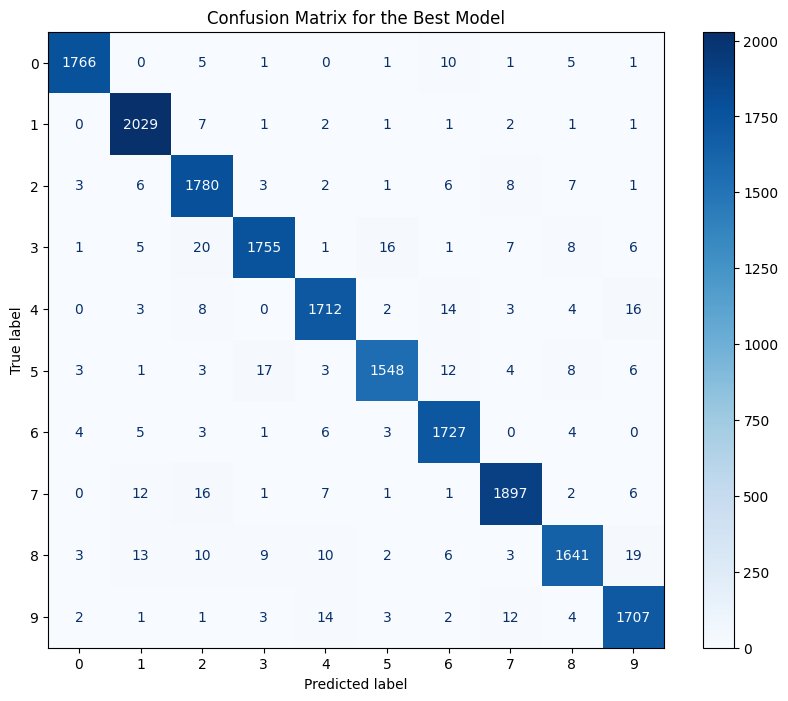

Métricas do modelo:
Accuracy: 0.9757
Precision: 0.9757
Recall: 0.9757
F1-Score: 0.9757


In [24]:
cm = confusion_matrix(y_teste, y_pred_c)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])



plt.figure(figsize=(10, 8))

disp.plot(cmap='Blues', values_format='d', ax=plt.gca())

plt.title('Confusion Matrix for the Best Model')

plt.show()



accuracy = accuracy_score(y_teste, y_pred_c)



report = classification_report(y_teste, y_pred_c, output_dict=True)



precision = report['weighted avg']['precision']

recall = report['weighted avg']['recall']

f1_score = report['weighted avg']['f1-score']



print("Métricas do modelo:")

print(f"Accuracy: {accuracy:.4f}")

print(f"Precision: {precision:.4f}")

print(f"Recall: {recall:.4f}")

print(f"F1-Score: {f1_score:.4f}")

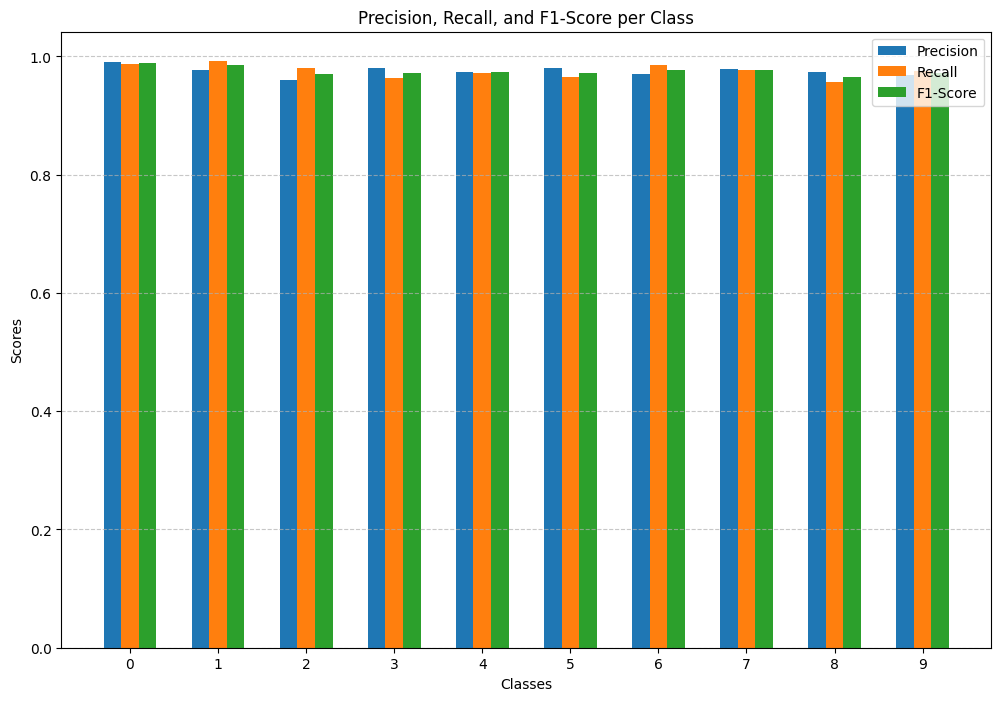

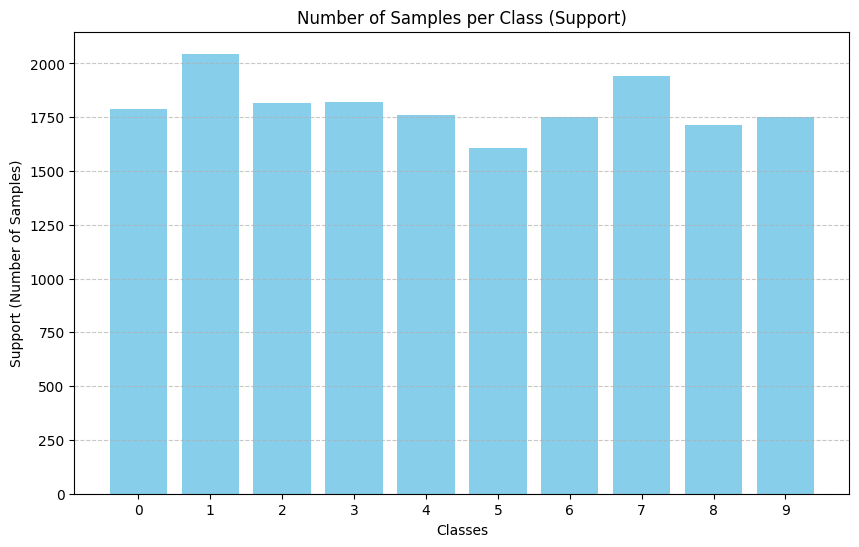

In [25]:
report = classification_report(y_teste, y_pred_c, output_dict=True)



classes = [str(i) for i in range(10)]





precision = [report[cls]['precision'] for cls in classes]

recall = [report[cls]['recall'] for cls in classes]

f1_score = [report[cls]['f1-score'] for cls in classes]

support = [report[cls]['support'] for cls in classes]



plt.figure(figsize=(12, 8))

x = np.arange(len(classes))



plt.bar(x - 0.2, precision, width=0.2, label='Precision', align='center')

plt.bar(x, recall, width=0.2, label='Recall', align='center')

plt.bar(x + 0.2, f1_score, width=0.2, label='F1-Score', align='center')



plt.xticks(x, classes)

plt.xlabel('Classes')

plt.ylabel('Scores')

plt.title('Precision, Recall, and F1-Score per Class')

plt.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



plt.figure(figsize=(10, 6))

plt.bar(classes, support, color='skyblue')

plt.xlabel('Classes')

plt.ylabel('Support (Number of Samples)')

plt.title('Number of Samples per Class (Support)')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Observando os gráficos e as métricas, é possível chegar à conclusão que o modelo performa de maneira muito satisfatória, com resultados entre 95% e 100%.

## 🐸 Item b)



Exiba gráficos que mostram a evolução da acurácia e da perda (`Loss`) durante o treinamento do melhor modelo encontrado no item 3c).

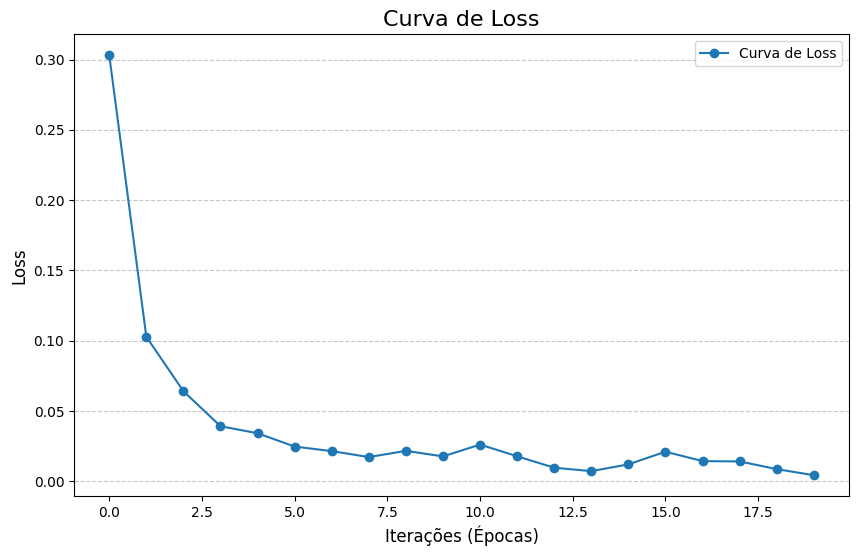

In [26]:
plt.figure(figsize=(10, 6))

plt.plot(modeloc.loss_curve_, marker='o', label='Curva de Loss')

plt.title('Curva de Loss', fontsize=16)

plt.xlabel('Iterações (Épocas)', fontsize=12)

plt.ylabel('Loss', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()

plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686

[CV] END activation=relu, hidden_layer_sizes=16, max_iter=10, solver=adam; total time=   4.1s
[CV] END activation=relu, hidden_layer_sizes=16, max_iter=15, solver=adam; total time=   6.1s
[CV] END activation=relu, hidden_layer_sizes=16, max_iter=20, solver=adam; total time=   7.9s
[CV] END activation=relu, hidden_layer_sizes=(32, 32), max_iter=15, solver=adam; total time=  10.1s
[CV] END activation=relu, hidden_layer_sizes=(32, 32), max_iter=20, solver=adam; total time=  12.1s
[CV] END activation=relu, hidden_layer_sizes=(64, 64, 64), max_iter=15, solver=adam; total time=  17.3s
[CV] END activation=relu, hidden_layer_sizes=(64, 64, 64), max_iter=20, solver=adam; total time=  23.2s
[CV] END activation=relu, hidden_layer_sizes=(256, 256, 256), max_iter=10, solver=adam; total time=  53.7s
[CV] END activation=relu, hidden_layer_sizes=(256, 256, 256), max_iter=20, solver=adam; total time= 1.8min
[CV] END activation=relu, hidden_layer_sizes=(256, 256, 256, 256), max_iter=10, solver=adam; tot

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


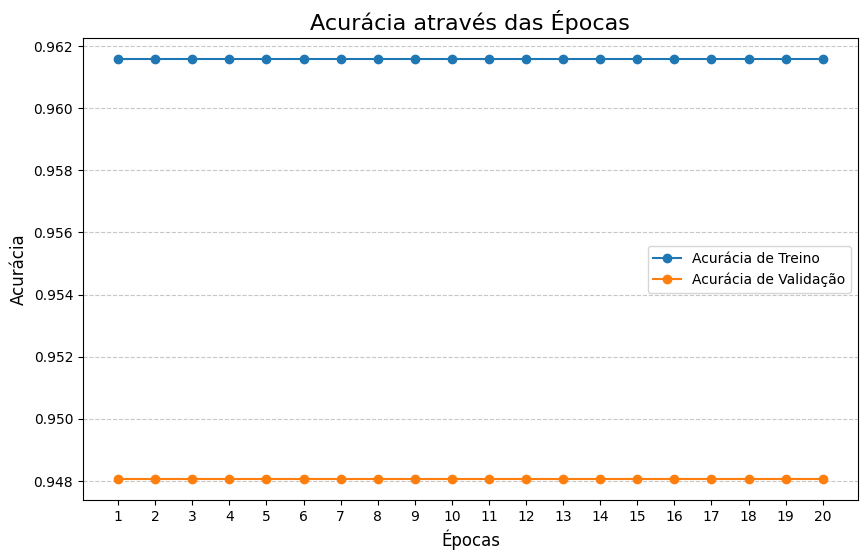

In [27]:
model = MLPClassifier(
    hidden_layer_sizes=(256, 256, 256),  
    activation='relu',
    solver='adam',               
    max_iter=1,                   
    random_state=42
)


epochs = 20
train_accuracies = []
test_accuracies = []

for epoch in range(epochs):
    model.fit(X_treino, y_treino) 
    y_train_pred = model.predict(X_treino)
    y_test_pred = model.predict(X_teste)
    
    train_accuracies.append(accuracy_score(y_treino, y_train_pred))
    test_accuracies.append(accuracy_score(y_teste, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_accuracies, label='Acurácia de Treino', marker='o')
plt.plot(range(1, epochs + 1), test_accuracies, label='Acurácia de Validação', marker='o')
plt.title('Acurácia através das Épocas', fontsize=16)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Acurácia', fontsize=12)
plt.xticks(range(1, epochs + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

## 🦖 Item c)



Escolha algumas imagens do conjunto de teste e mostre previsões do seu modelo, com acertos e erros. Discuta quais fatores podem ter contribuído para essas previsões corretas e incorretas.

In [28]:
X_testeM = np.array(X_teste).reshape(-1, 28, 28)

X_correto = X_testeM[y_teste == y_pred_c]

y_pred_correto = y_pred_c[y_teste == y_pred_c]

y_correto = y_teste[y_teste == y_pred_c]

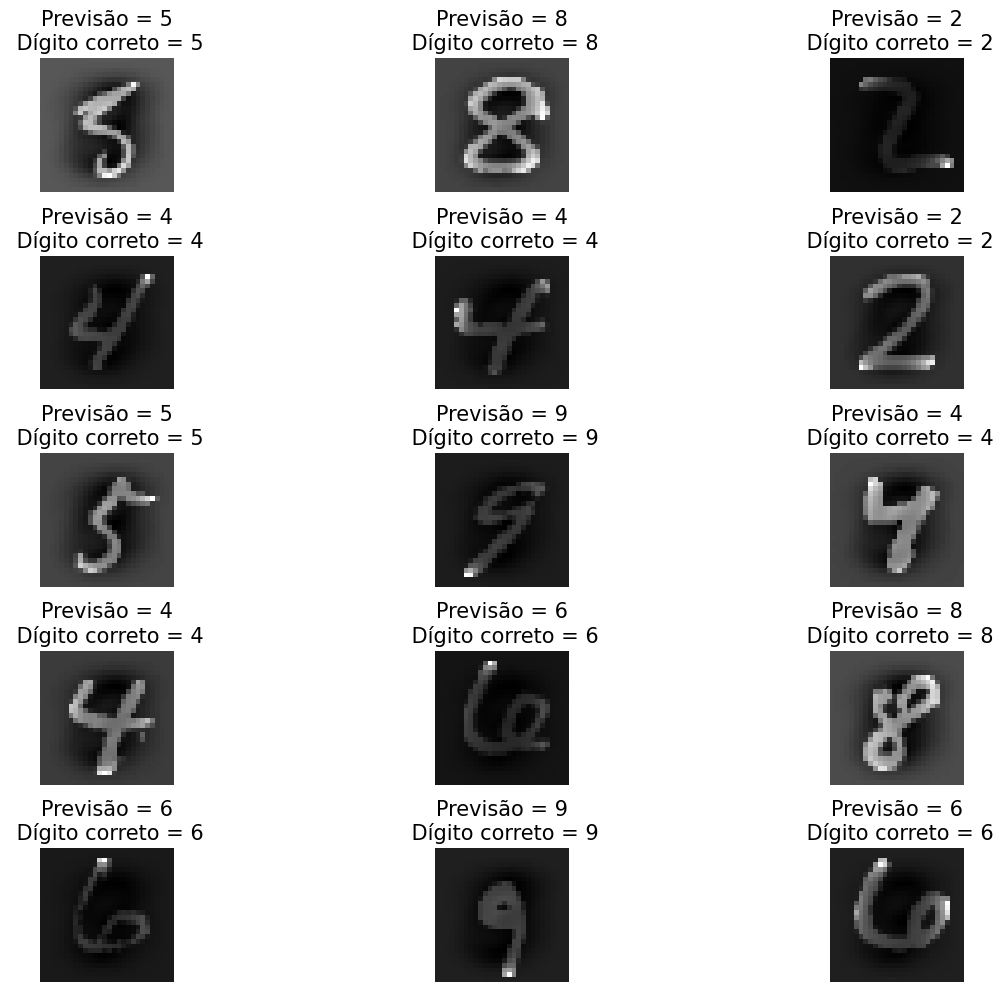

In [29]:
show_images(X_correto[:15], [f'Previsão = {y_pred_correto[k]}\n Dígito correto = {y_correto[k]}' for k in range(15)])

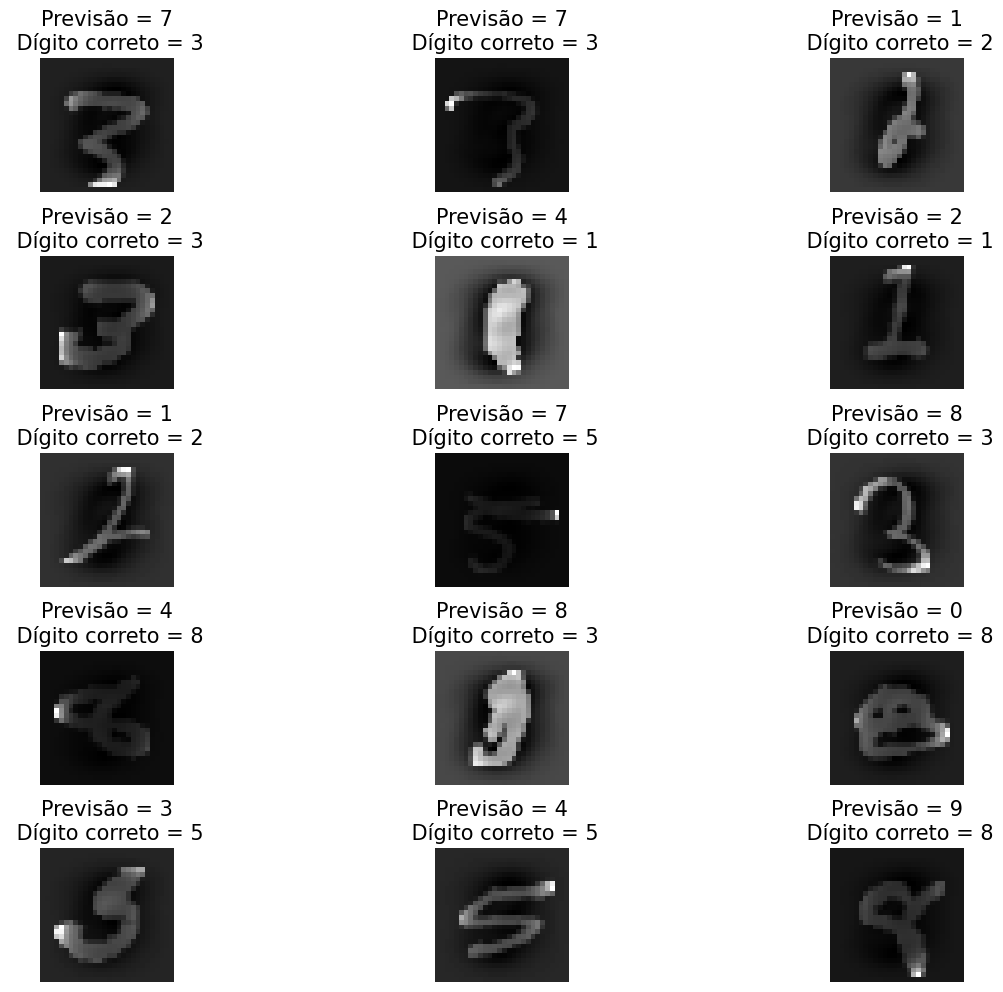

In [30]:
X_incorreto = X_testeM[y_teste != y_pred_c]

y_pred_incorreto = y_pred_c[y_teste != y_pred_c]

y_incorreto = y_teste[y_teste != y_pred_c]



show_images(X_incorreto[:15], [f'Previsão = {y_pred_incorreto[k]}\n Dígito correto = {y_incorreto[k]}' for k in range(15)])

Naqueles que foram considerados corretos, podemos observar que a forma como foram escritos está muito próxima daquela que consideramos "padrão", isto é, que grande parte das pessoas conseguiria reconhecer com facilidade e segue as convenções usuais para desenhar esses números. 



Por outro lado, aqueles que foram identificados incorretamente muitas vezes possuem uma grafia um pouco não convencional, de forma que às vezes fique dúbio até mesmo para um humano qual número seria. 

---

# 5️⃣ Tarefa 05: Lembrete *Kaggle* e Documentação 🗃️

## 😮‍💨 Item a)



# Lembre-se de publicar no *Kaggle* com o título correto e padronizado!

## 🙏🏻 Item b)



# Lembre-se de documentar adequadamente seu código e conclusões!

### Código para a submissão

In [31]:
X_treino = X

y_treino = y_tot



modelo_sub = MLPClassifier(

    hidden_layer_sizes=(256, 256, 256),

    max_iter=20,

    random_state=42,

    solver='adam',

    activation='relu'

)



modelo_sub.fit(X_treino, y_treino)



X_val = [X_val[i].flatten() for i in range(len(X_val))]

X_val = scaler.transform(X_val)

y_pred_val = modelo_sub.predict(X_val)



df_submissão = pd.DataFrame({'ID': np.arange(1,10001), 'Answer': y_pred_val})

df_submissão.set_index("ID", inplace = True)

df_submissão.to_csv("submission.csv")

df_submissão.head()    

[CV] END activation=relu, hidden_layer_sizes=16, max_iter=10, solver=adam; total time=   4.3s
[CV] END activation=relu, hidden_layer_sizes=16, max_iter=20, solver=adam; total time=   8.3s
[CV] END activation=relu, hidden_layer_sizes=(32, 32), max_iter=10, solver=adam; total time=   6.2s
[CV] END activation=relu, hidden_layer_sizes=(32, 32), max_iter=15, solver=adam; total time=   9.9s
[CV] END activation=relu, hidden_layer_sizes=(64, 64, 64), max_iter=10, solver=adam; total time=  11.5s
[CV] END activation=relu, hidden_layer_sizes=(64, 64, 64), max_iter=15, solver=adam; total time=  17.7s
[CV] END activation=relu, hidden_layer_sizes=(64, 64, 64), max_iter=20, solver=adam; total time=  23.0s
[CV] END activation=relu, hidden_layer_sizes=(256, 256, 256), max_iter=15, solver=adam; total time= 1.3min
[CV] END activation=relu, hidden_layer_sizes=(256, 256, 256), max_iter=20, solver=adam; total time= 1.8min
[CV] END activation=relu, hidden_layer_sizes=(256, 256, 256, 256), max_iter=10, solver

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


,Answer
ID,
1,8
2,4
3,8
4,7
5,7
